In [1]:
from IPython.display import Image
import numpy as numpy
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
%matplotlib inline

## What is bitcoin 比特币

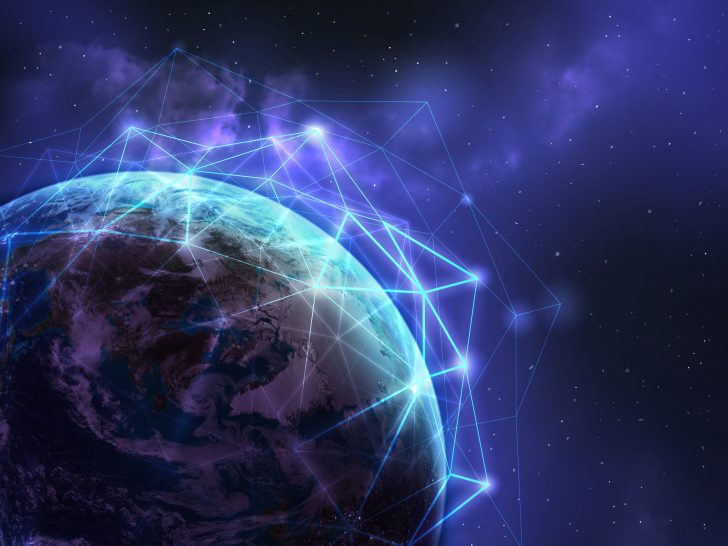

In [3]:
Image("https://www.coindesk.com/wp-content/uploads/2018/01/shutterstock_667929118-728x546.jpg", width=500, height=500)

##### It is a type of digital currency, linking node to node (or P2P)

## import bitcoin trading data from yahoo  比特币交易时间序列 
Let's call the data "blah" instead of bitcoin just for fun.

In [4]:
blah = pdr.get_data_yahoo('BTC-USD', start=datetime.datetime(2010, 7, 16), end=datetime.date.today())
#first few rows of data when bitcoin began to be traded. The price seem to be free. 
blah.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0,0.04951
2010-07-17,0.08585,0.05941,0.04951,0.08584,5,0.08584
2010-07-18,0.09307,0.07723,0.08584,0.08080,49,0.08080
2010-07-19,0.08181,0.07426,0.08080,0.07474,20,0.07474
2010-07-20,0.07921,0.06634,0.07474,0.07921,42,0.07921


In [5]:
#As of Dec 28, 2018, the data set has 3088 row (since July 16, 2010)
blah.shape

(3088, 6)

In [6]:
#Change the format to make numbers display more nicely
pd.options.display.float_format = '{:20,.0f}'.format

In [7]:
blah.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-25,"4,095","3,735","4,082","3,835",367200910,"3,835"
2018-12-26,"3,924","3,747","3,835","3,849",263439573,"3,849"
2018-12-27,"3,889","3,622","3,849","3,646",305729129,"3,646"
2018-12-28,"4,008","3,628","3,646","3,948",353705007,"3,948"
2018-12-30,"3,834","3,761","3,797","3,824",42742544,"3,824"


#### Trading volume = how much interest people have in bitcoin

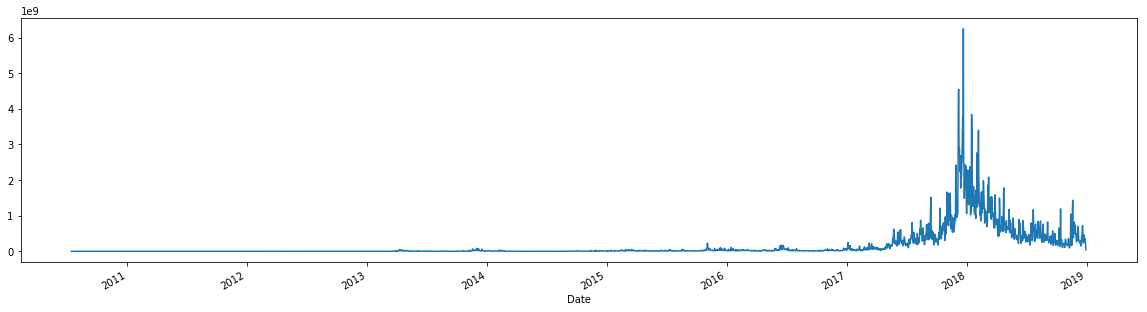

In [8]:
fig = plt.figure(figsize = (20,5))
blah.Volume.plot()

#### What did the plot tell you?
Note: Do you know what '1e9' means on the vertical axis? It means 1000000000, i.e. 10^9.  This is scientific notation. 

It shows that in 2010, there was hardly anybody trading Bitcoin.  
It was like that for a long time until 2017.  
Suddenly people traded like crazy about it in 2017.  
They did more than half of a billion trades in one single date somewhere around year end 2017.

#### Trading price = how much did/do people believe bitcoin worth

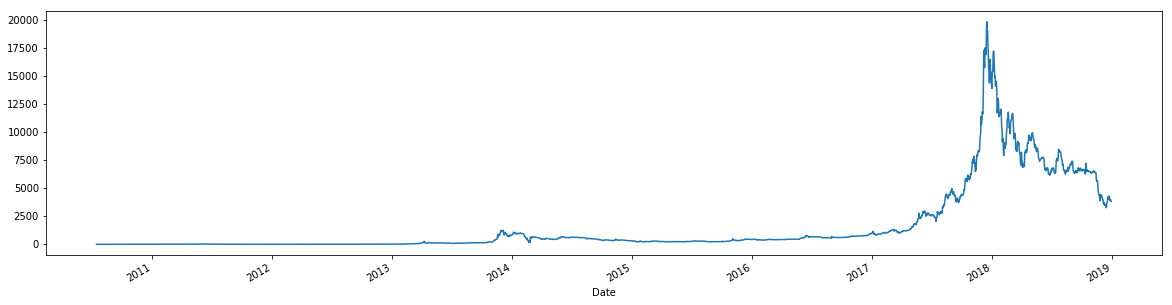

In [9]:
fig = plt.figure(figsize = (20,5))
blah.High.plot()

##### All the data plotted together.  Note that volume is measured on the secondary y axis.  

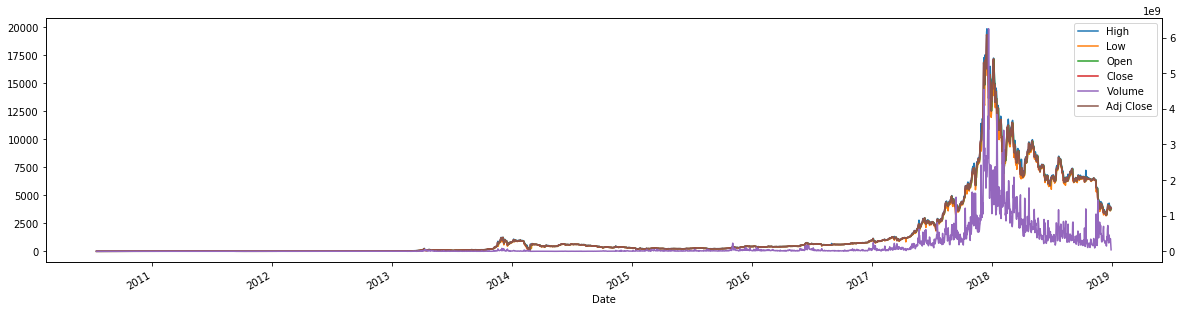

In [10]:
blah.plot(secondary_y=['Volume'], mark_right=False, figsize = (20,5))

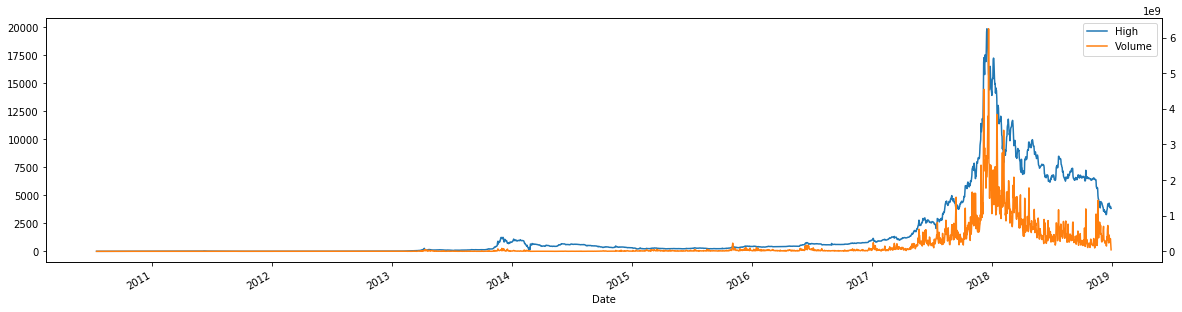

In [11]:
blah[['High',"Volume"]].plot(secondary_y=['Volume'], mark_right=False, figsize=(20, 5))


#### The colors are not that nice.  Let's see what's readilly available without we start customizing.

In [12]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [13]:
plt.style.use('seaborn-pastel')

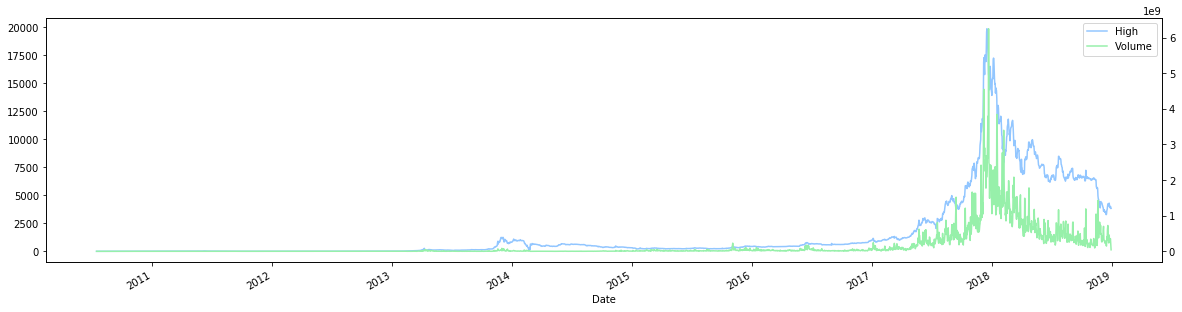

In [14]:
blah[['High',"Volume"]].plot(secondary_y=['Volume'], mark_right=False, figsize=(20, 5))

### Trading price is correlated with trading volume
In other words, these two are related.

### Let's check out which dates have the max of everything

In [15]:
blah.idxmax(axis=0, skipna=True)

High        2017-12-17
Low         2017-12-17
Open        2017-12-17
Close       2017-12-16
Volume      2017-12-22
Adj Close   2017-12-16
dtype: datetime64[ns]

It says bitcoin price is the highest on Dec 17, 2017, and the highest trading volume on Dec 12, 22.  
Let's take a look at those dates.
People seemed very excited about bitcoin. 

In [16]:
blah.loc["2017-12-17":"2017-12-22"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-17,"19,871","18,751","19,347","19,066",2264650369,"19,066"
2017-12-18,"19,221","18,114","19,066","18,972",2597510049,"18,972"
2017-12-19,"19,022","16,813","18,971","17,524",3136709262,"17,524"
2017-12-20,"17,814","15,643","17,522","16,462",3791752510,"16,462"
2017-12-21,"17,302","14,953","16,461","15,632",2619295475,"15,632"
2017-12-22,"15,824","10,876","15,632","13,665",6245731508,"13,665"
